# Brain Tumor Classification

In this notebook, I will fit the models for Brain Tumor classification. I have three different tumors Glioma, Meningioma, and Pituitary. They all have the same number of images for training. My No Tumar class is almost half the size of any tumor class. My baseline for this classification is 30%.

In [1]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import EfficientNetV2S

import functions

import numpy as np
np.random.seed(18)

In [2]:
# The path to the training set
bt_path_train = '../data/brain_tumor/train'

In [3]:
# Set image size
image_size = 240
# Set Early stopping
es = EarlyStopping(patience = 5, restore_best_weights=True)

In [17]:
# Sets for models using TensorFlow
bt_train_ds, bt_val_ds = image_dataset_from_directory(
    bt_path_train,
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=64,
    image_size=(image_size, image_size),
    seed=18,
    validation_split=0.1,
    subset = 'both'
)

Found 2870 files belonging to 4 classes.
Using 2583 files for training.
Using 287 files for validation.


In [18]:
# Load test data
bt_test_ds = image_dataset_from_directory(
    '../data/brain_tumor/test',
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=64,
    image_size=(image_size, image_size),
    seed=18
)

Found 394 files belonging to 4 classes.


In [21]:
es = EarlyStopping(patience = 5, restore_best_weights=True)
model = Sequential()
model.add(layers.Input(shape=(image_size, image_size, 1)))
model.add(layers.Rescaling(1./255))
model.add(Conv2D(64,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(64,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(128,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(256,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(512,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256, activation="linear", kernel_regularizer=l2(0.005)))
model.add(Dropout(0.2))
model.add(Dense(256, activation="linear", kernel_regularizer=l2(0.005)))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))
# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h = model.fit(bt_train_ds, validation_data = bt_val_ds, epochs=50, callbacks = [es])

Epoch 1/50
41/41 [==============================] - 145s 3s/step - loss: 1.1399 - accuracy: 0.4959 - val_loss: 0.8280 - val_accuracy: 0.6585
Epoch 2/50
41/41 [==============================] - 141s 3s/step - loss: 0.7441 - accuracy: 0.6860 - val_loss: 0.5959 - val_accuracy: 0.7596
Epoch 3/50
41/41 [==============================] - 244s 6s/step - loss: 0.5912 - accuracy: 0.7743 - val_loss: 0.4960 - val_accuracy: 0.8153
Epoch 4/50
41/41 [==============================] - 246s 6s/step - loss: 0.5071 - accuracy: 0.7987 - val_loss: 0.5312 - val_accuracy: 0.7770
Epoch 5/50
41/41 [==============================] - 255s 6s/step - loss: 0.4070 - accuracy: 0.8386 - val_loss: 0.3610 - val_accuracy: 0.8571
Epoch 6/50
41/41 [==============================] - 257s 6s/step - loss: 0.3142 - accuracy: 0.8831 - val_loss: 0.3604 - val_accuracy: 0.8502
Epoch 7/50
41/41 [==============================] - 241s 6s/step - loss: 0.2639 - accuracy: 0.9028 - val_loss: 0.3146 - val_accuracy: 0.8990
Epoch 8/50
41

In [ ]:
0.753

Accuracy_score: 0.7157 



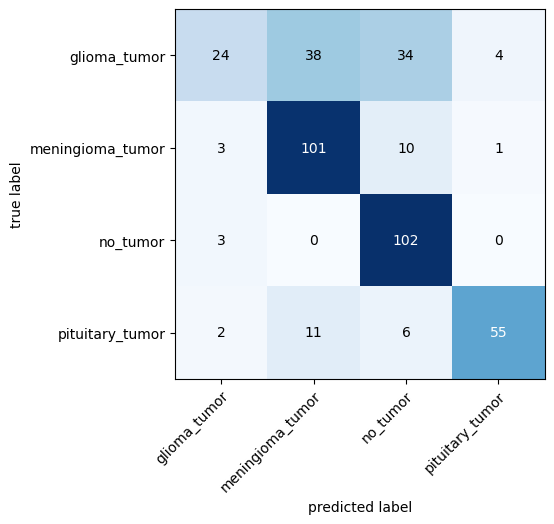

In [26]:
# Plot Confusion Matrix
functions.acc_conf_matrix(model, val_data=bt_test_ds)

In [23]:
es = EarlyStopping(patience = 5, restore_best_weights=True)
model = Sequential()
model.add(layers.Input(shape=(image_size, image_size, 1)))
model.add(layers.Rescaling(1./255))
model.add(Conv2D(64,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(64,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(128,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(256,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(512,kernel_size = (2,2),strides = (1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256, activation="linear", kernel_regularizer=l2(0.005)))
model.add(Dropout(0.2))
model.add(Dense(256, activation="linear", kernel_regularizer=l2(0.005)))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))
# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h = model.fit(bt_train_ds, validation_data = bt_val_ds, epochs=50, callbacks = [es])

Epoch 1/50
41/41 [==============================] - 261s 6s/step - loss: 2.7788 - accuracy: 0.4441 - val_loss: 1.7731 - val_accuracy: 0.5401
Epoch 2/50
41/41 [==============================] - 242s 6s/step - loss: 1.5670 - accuracy: 0.6024 - val_loss: 1.2062 - val_accuracy: 0.6620
Epoch 3/50
41/41 [==============================] - 255s 6s/step - loss: 1.1730 - accuracy: 0.6837 - val_loss: 1.0630 - val_accuracy: 0.7352
Epoch 4/50
41/41 [==============================] - 310s 8s/step - loss: 0.9844 - accuracy: 0.7515 - val_loss: 0.8658 - val_accuracy: 0.7875
Epoch 5/50
41/41 [==============================] - 424s 10s/step - loss: 0.8980 - accuracy: 0.7650 - val_loss: 0.9274 - val_accuracy: 0.7282
Epoch 6/50
41/41 [==============================] - 421s 10s/step - loss: 0.8064 - accuracy: 0.7886 - val_loss: 0.7546 - val_accuracy: 0.7840
Epoch 7/50
41/41 [==============================] - 407s 10s/step - loss: 0.6642 - accuracy: 0.8420 - val_loss: 0.6771 - val_accuracy: 0.8432
Epoch 8/50

Accuracy_score: 0.7157 



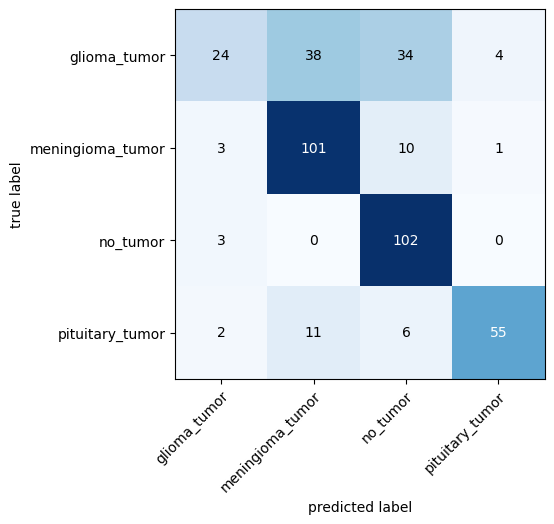

In [25]:
# Plot Confusion Matrix
functions.acc_conf_matrix(model, val_data=bt_test_ds)

## Model without Augmentation

In [40]:
model = Sequential()


model.add(layers.Input(shape=(image_size, image_size, 1)))
model.add(layers.Rescaling(1./255))

#First Convolution
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))
#Second Convolution
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))
#Third Convolution
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))
#Fourth Convolution
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))
#Flatten
model.add(Flatten())
# Fully Connected
model.add(Dense(32, activation = 'relu', kernel_regularizer=l2(0.005)))
model.add(Dropout(.2))
model.add(Dense(32, activation = 'relu', kernel_regularizer=l2(0.005)))
model.add(Dropout(.2))
model.add(Dense(4, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h = model.fit(bt_train_ds, validation_data = bt_val_ds, epochs=50, callbacks = [es])

Epoch 1/50
36/36 [==============================] - 37s 1s/step - loss: 1.5767 - accuracy: 0.4232 - val_loss: 1.3233 - val_accuracy: 0.5401
Epoch 2/50
36/36 [==============================] - 37s 1s/step - loss: 1.2398 - accuracy: 0.5233 - val_loss: 1.0639 - val_accuracy: 0.6289
Epoch 3/50
36/36 [==============================] - 52s 1s/step - loss: 1.0713 - accuracy: 0.5908 - val_loss: 0.9438 - val_accuracy: 0.6847
Epoch 4/50
36/36 [==============================] - 54s 2s/step - loss: 0.9607 - accuracy: 0.6443 - val_loss: 0.8612 - val_accuracy: 0.7178
Epoch 5/50
36/36 [==============================] - 53s 1s/step - loss: 0.9268 - accuracy: 0.6508 - val_loss: 0.8542 - val_accuracy: 0.6829
Epoch 6/50
36/36 [==============================] - 54s 1s/step - loss: 0.9042 - accuracy: 0.6709 - val_loss: 0.7463 - val_accuracy: 0.7735
Epoch 7/50
36/36 [==============================] - 56s 2s/step - loss: 0.7650 - accuracy: 0.7471 - val_loss: 0.6808 - val_accuracy: 0.7909
Epoch 8/50
36/36 [==

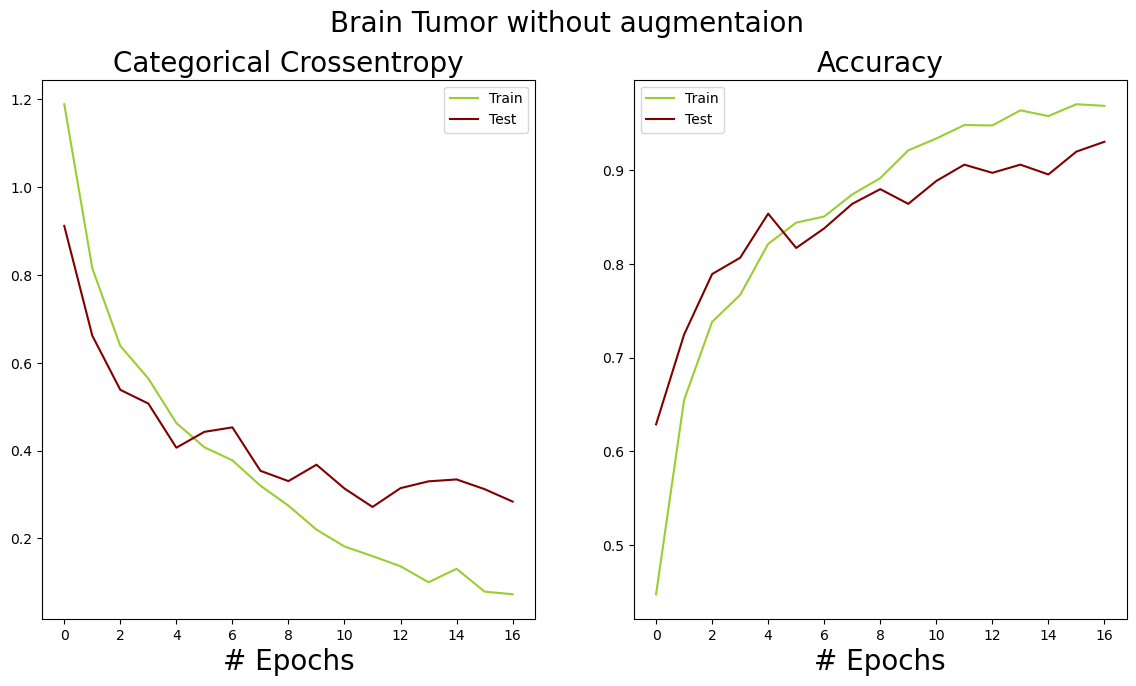

In [11]:
# Plot Crossentropy and Accuracy by epoch
functions.evaluation_plots(h, 'Brain Tumor without augmentaion')

Accuracy_score: 0.8902 



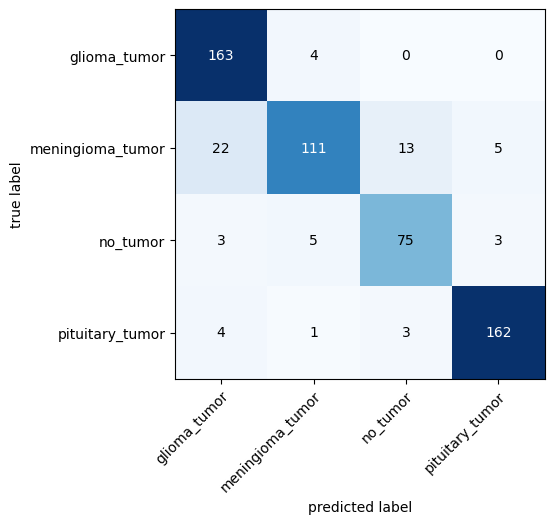

In [45]:
# Plot Confusion Matrix
functions.acc_conf_matrix(model, val_data=bt_val_ds)

The model struggle to predict Meningioma vs Glioma ana Meningioma vs no tumor the most. I will try pre-trained models to improve the classifications.

The model struggle to predict Meningioma vs Glioma ana Meningioma vs no tumor the most. I will try pre-trained models to improve the classifications.

Accuracy_score: 0.6827 



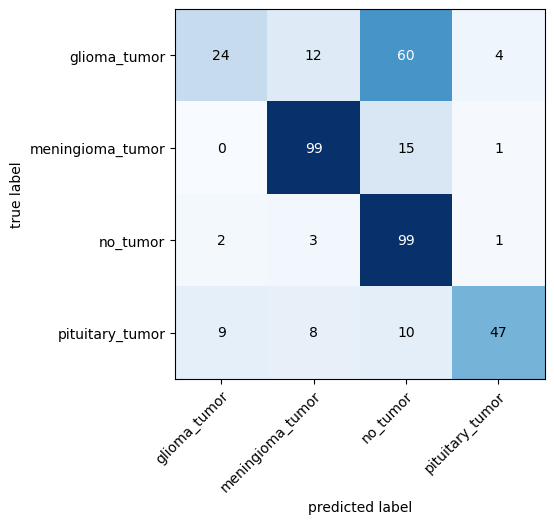

In [46]:
# Plot Confusion Matrix
functions.acc_conf_matrix(model, val_data=bt_test_ds)

My moder is overfit. On test data it performs much worser.

# Pre-trained models

Pre-trained models requare color images I will have to read the images separately and convert each to RGB

In [27]:
# Read the images, convert to greyscale and prepare for Tensorflow models
X_train, X_val, y_train, y_val = functions.read_grey_images_to_rgb('../data/brain_tumor/train')

# Check the shape of the data
X_train.shape, y_train.shape

((2152, 240, 240, 3), (2152, 4))

In [28]:
# Prepare the training data for predictions
X_test, y_test = functions.read_grey_images_to_rgb('../data/alzheimer/test', train_test = False)

# Check the shape of the data
X_test.shape, y_test.shape

((1279, 240, 240, 3), (1279, 4))

---

## EfficientNetV2S

In [6]:
effnet = EfficientNetV2S(
    include_top=False,
    weights="imagenet",
    input_shape=(image_size, image_size, 3),
    classes=4,
    classifier_activation="softmax",
    include_preprocessing=True,
)

In [7]:
# Freeze last 5 layers
for layer in effnet.layers[:-5]:
    layer.trainable = False

In [8]:
model = Sequential()

model.add(effnet)
model.add(GlobalAveragePooling2D())
model.add(Dropout(.2))

#Just use a single output layer
model.add(Dense(4, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h_efv2s = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=50, callbacks = [es])

Epoch 1/50
68/68 [==============================] - 137s 2s/step - loss: 0.6091 - accuracy: 0.7574 - val_loss: 0.3779 - val_accuracy: 0.8565
Epoch 2/50
68/68 [==============================] - 121s 2s/step - loss: 0.3903 - accuracy: 0.8569 - val_loss: 0.3317 - val_accuracy: 0.8719
Epoch 3/50
68/68 [==============================] - 123s 2s/step - loss: 0.3107 - accuracy: 0.8936 - val_loss: 0.2927 - val_accuracy: 0.8942
Epoch 4/50
68/68 [==============================] - 118s 2s/step - loss: 0.2333 - accuracy: 0.9178 - val_loss: 0.2737 - val_accuracy: 0.9011
Epoch 5/50
68/68 [==============================] - 171s 3s/step - loss: 0.2201 - accuracy: 0.9201 - val_loss: 0.2588 - val_accuracy: 0.8955
Epoch 6/50
68/68 [==============================] - 188s 3s/step - loss: 0.1928 - accuracy: 0.9322 - val_loss: 0.2461 - val_accuracy: 0.9192
Epoch 7/50
68/68 [==============================] - 190s 3s/step - loss: 0.1718 - accuracy: 0.9349 - val_loss: 0.2318 - val_accuracy: 0.9192
Epoch 8/50
68

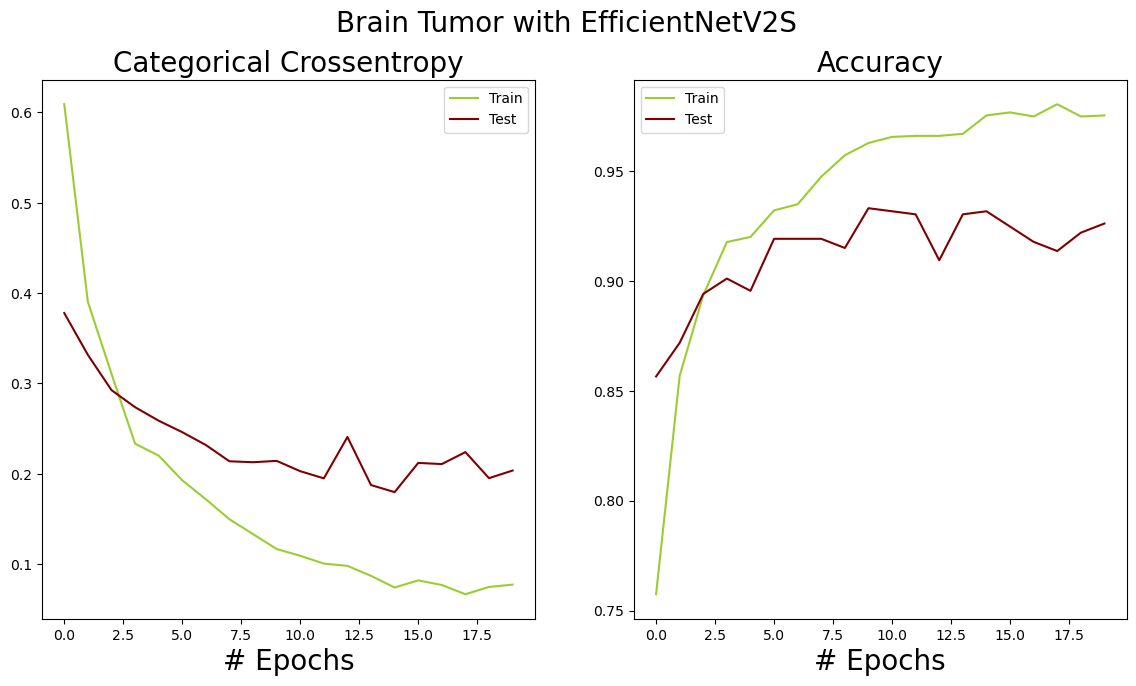

In [11]:
# Plot Crossentropy and Accuracy by epoch
functions.evaluation_plots(h_efv2s, 'Brain Tumor with EfficientNetV2S')

Accuracy_score: 0.9262 



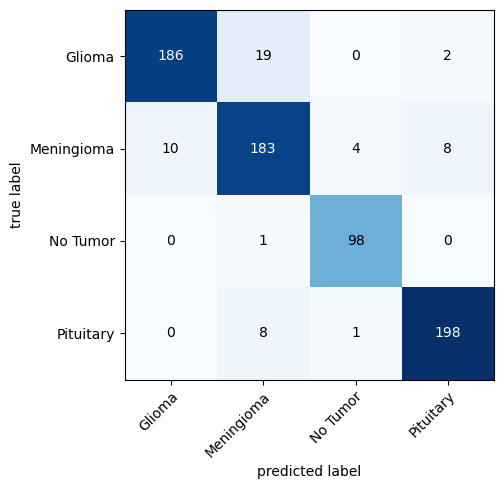

In [18]:
# Validating set Plot Confusion Matrix and print Accuracy
functions.acc_conf_matrix(model, X=X_val, y=y_val, class_names_list = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'])

The highest missclassified are the same, EfficientNetV2S model performed better, than previous one (less missclasification)

Accuracy_score: 0.5004 



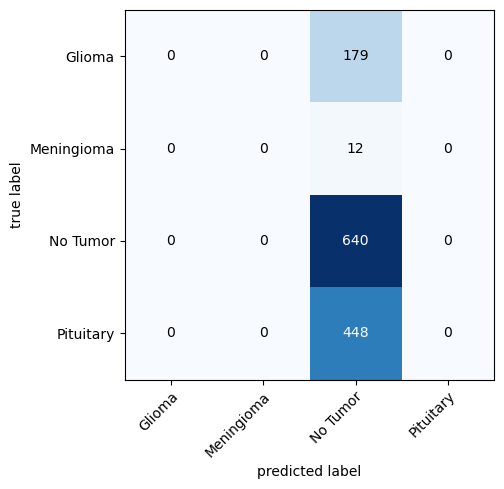

In [20]:
# Testing set Plot Confusion Matrix and print Accuracy
functions.acc_conf_matrix(model, X=X_test, y=y_test, class_names_list = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'])

The model struggles to identify Glioma tumor from test set. I will use different model and augmentation to reduce missclassification

In [21]:
#model.save('../models/bt_EfficientNetV2S.hdf5')

## Xception

In [21]:
from tensorflow.keras.applications import Xception

In [22]:
xception_model = Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(image_size, image_size, 3),
    classes=4,
    classifier_activation="softmax"
)

In [23]:
# Freeze last 5 layers
for layer in xception_model.layers[:-5]:
    layer.trainable = False

In [24]:
model = Sequential()

model.add(xception_model)
model.add(GlobalAveragePooling2D())

#Just use a single output layer
model.add(Dense(4, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h_xc = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=50, callbacks = [es])

Epoch 1/50
68/68 [==============================] - 218s 3s/step - loss: 0.7264 - accuracy: 0.7040 - val_loss: 2.8805 - val_accuracy: 0.4777
Epoch 2/50
68/68 [==============================] - 202s 3s/step - loss: 0.4355 - accuracy: 0.8341 - val_loss: 0.7087 - val_accuracy: 0.7451
Epoch 3/50
68/68 [==============================] - 202s 3s/step - loss: 0.3463 - accuracy: 0.8704 - val_loss: 0.4382 - val_accuracy: 0.8357
Epoch 4/50
68/68 [==============================] - 203s 3s/step - loss: 0.2785 - accuracy: 0.8908 - val_loss: 0.3921 - val_accuracy: 0.8621
Epoch 5/50
68/68 [==============================] - 200s 3s/step - loss: 0.2273 - accuracy: 0.9252 - val_loss: 0.3574 - val_accuracy: 0.8649
Epoch 6/50
68/68 [==============================] - 202s 3s/step - loss: 0.1786 - accuracy: 0.9401 - val_loss: 0.3867 - val_accuracy: 0.8719
Epoch 7/50
68/68 [==============================] - 177s 3s/step - loss: 0.1592 - accuracy: 0.9433 - val_loss: 0.3649 - val_accuracy: 0.8705
Epoch 8/50
68

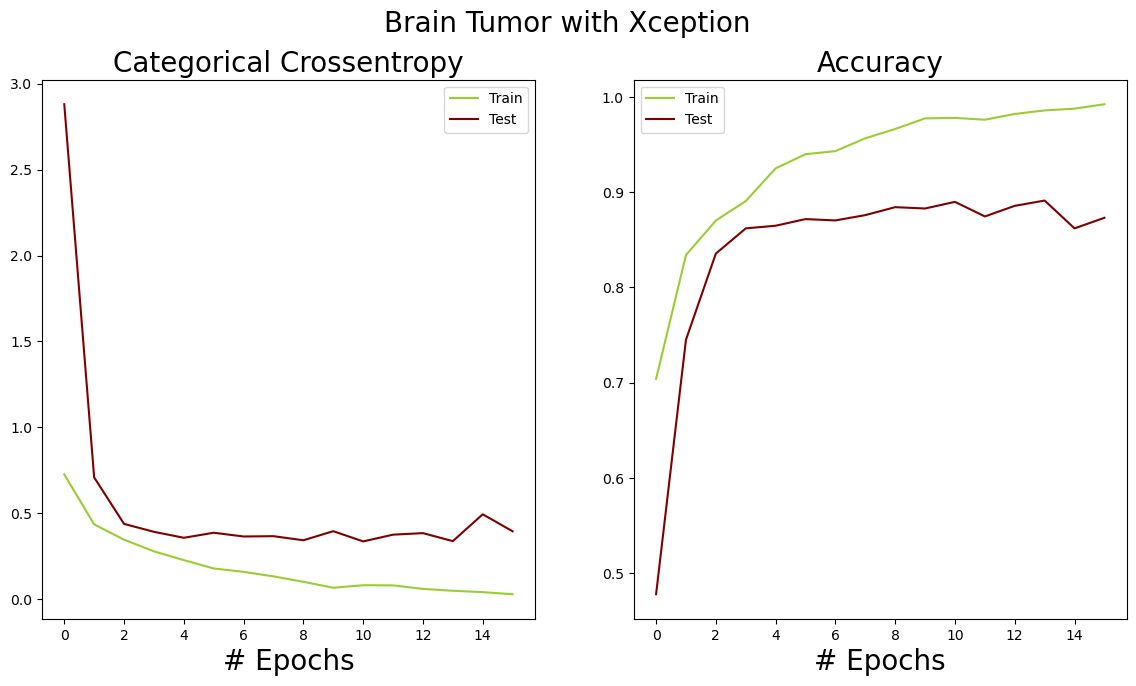

In [25]:
# Plot Crossentropy and Accuracy by epoch
functions.evaluation_plots(h_xc, 'Brain Tumor with Xception')

Accuracy_score: 0.8733 



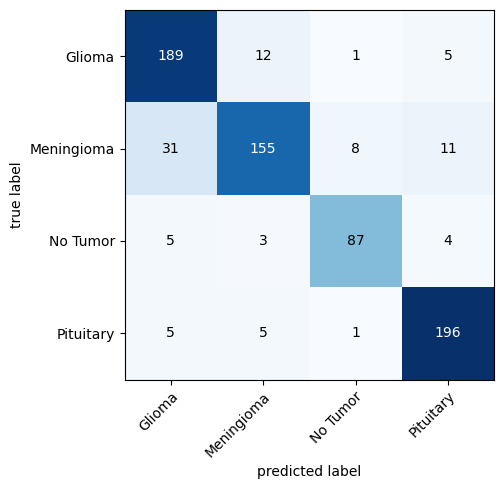

In [26]:
# Validating set Plot Confusion Matrix and print Accuracy
acc_conf_matrix(model, X=X_val, y=y_val, class_names_list = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'])

Accuracy_score: 0.4386 



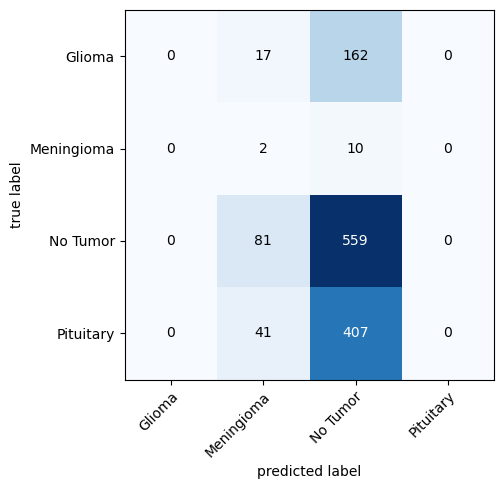

In [27]:
# Testing set Plot Confusion Matrix and print Accuracy
acc_conf_matrix(model, X=X_test, y=y_test, class_names_list = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'])

This model struggles with Glioma the most as well and has more missclassification overall than EfficientNetV2S. I will try augmentation to improve the models

## ResNet50

In [29]:
from tensorflow.keras.applications import resnet50

rn_model = resnet50.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(image_size, image_size, 3),
    classes=4,
    classifier_activation="softmax"
)

In [30]:
# Freeze last 5 layers
for layer in rn_model.layers:
    layer.trainable = False

In [31]:
es = EarlyStopping(patience = 5, restore_best_weights=True)

model = Sequential()

model.add(rn_model)
model.add(Flatten())

#Just use a single output layer
model.add(Dense(4, activation='softmax'))

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

h_rn = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=50, callbacks = [es])

Epoch 1/50
68/68 [==============================] - 413s 6s/step - loss: 5.7764 - accuracy: 0.7783 - val_loss: 2.0234 - val_accuracy: 0.8969
Epoch 2/50
68/68 [==============================] - 382s 6s/step - loss: 0.6966 - accuracy: 0.9498 - val_loss: 2.8425 - val_accuracy: 0.8593
Epoch 3/50
68/68 [==============================] - 384s 6s/step - loss: 0.3756 - accuracy: 0.9665 - val_loss: 1.7362 - val_accuracy: 0.9109
Epoch 4/50
68/68 [==============================] - 386s 6s/step - loss: 0.1774 - accuracy: 0.9823 - val_loss: 2.1127 - val_accuracy: 0.9011
Epoch 5/50
68/68 [==============================] - 382s 6s/step - loss: 0.0781 - accuracy: 0.9884 - val_loss: 1.4490 - val_accuracy: 0.9220
Epoch 6/50
68/68 [==============================] - 384s 6s/step - loss: 0.1756 - accuracy: 0.9837 - val_loss: 2.0132 - val_accuracy: 0.9304
Epoch 7/50
68/68 [==============================] - 382s 6s/step - loss: 0.1293 - accuracy: 0.9870 - val_loss: 5.1696 - val_accuracy: 0.8106
Epoch 8/50
68

Accuracy_score: 0.5004 



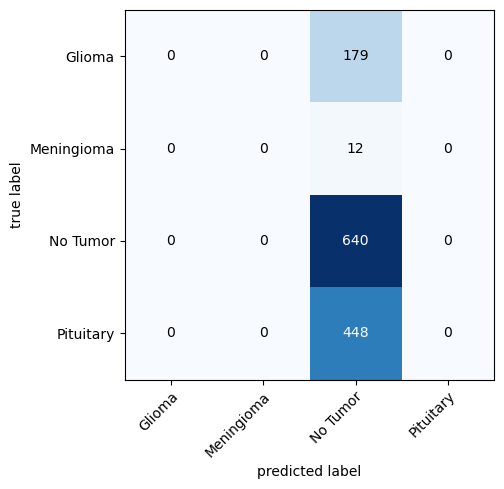

In [32]:
# Testing set Plot Confusion Matrix and print Accuracy
functions.acc_conf_matrix(model, X=X_test, y=y_test, class_names_list = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'])

---

My best model so far is EfficientNetV2S with 78% accuracy on test set. It is still overfit. In the next notebbok I will use Augmentation to improve the model.